## NoiseOptimizer

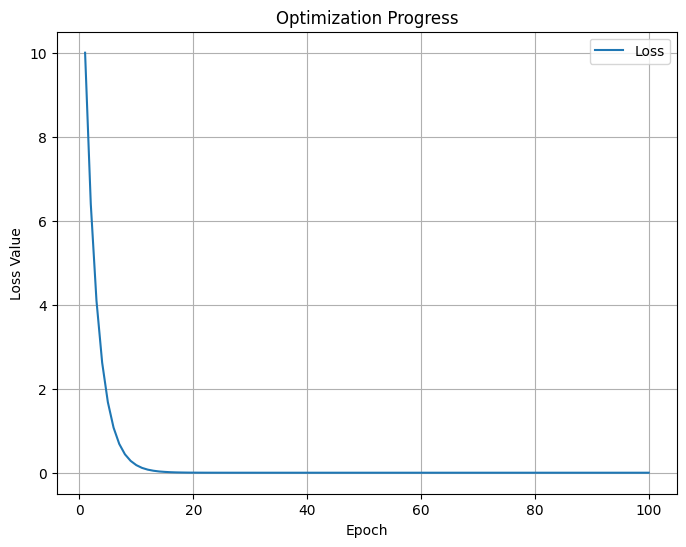

In [1]:
import torch
import matplotlib.pyplot as plt
from NoiseOptimizer import NoiseOptimizer

# A simple quadratic function as a stand-in for a more complex loss landscape
def simple_quadratic_function(x):
    return torch.sum(x**2)

# Parameters to optimize (initializing with ones)
params = torch.ones(10, requires_grad=True)

# Using SGD as the base optimizer
base_optimizer = torch.optim.SGD([params], lr=0.1)

# Wrapping SGD with the NoiseOptimizer (assuming you've defined this elsewhere)
noise_optimizer = NoiseOptimizer(base_optimizer, noise_decay=0.995)

# Lists to store progress
loss_history = []
noise_stddev_history = []

# Simulate training for 100 epochs
for epoch in range(100):

    loss = simple_quadratic_function(params)
    loss.backward()
    
    noise_optimizer.step()
    noise_optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        noise_optimizer.apply_noise_decay()

    # Log progress
    loss_history.append(loss.item())
    noise_stddev_history.append(noise_optimizer.noise_stddev)

# Plot the loss function value over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, 101), loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Optimization Progress')
plt.grid(True)
plt.legend()
plt.show()